<a href="https://colab.research.google.com/github/gauravs0905/Netflix_Data_Analysis/blob/main/Netflix_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Netflix Data Analysis Project**

**Author:** Gaurav Singh

**IDE:** Google Colab Notebook

**Contribution:** Individiual

**Github Link:** **https://github.com/gauravs0905/Netflix_Data_Analysis**

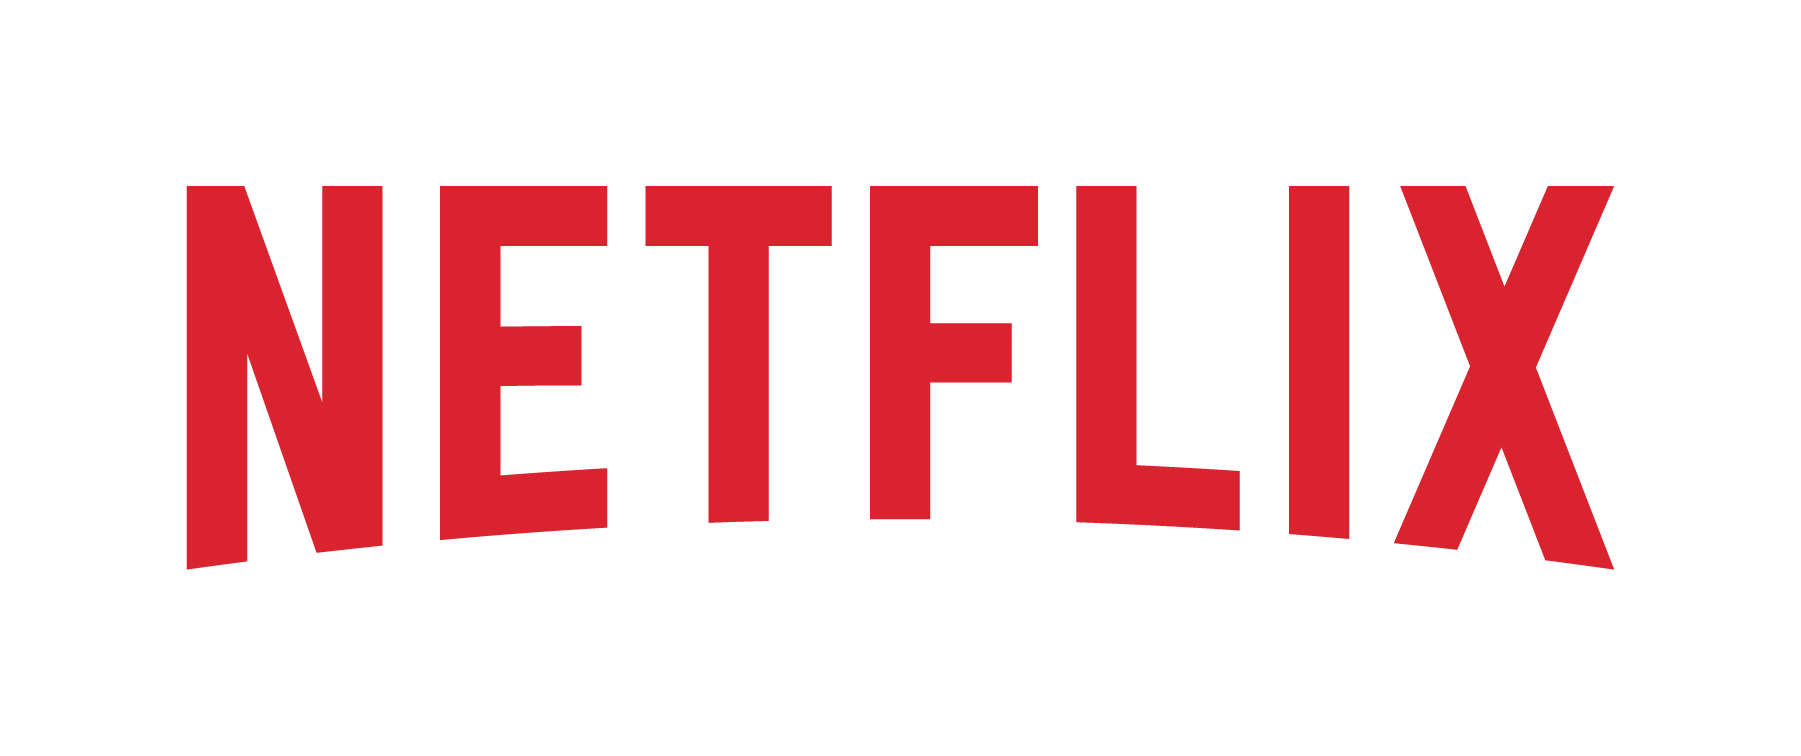

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

###Loading Dataset

In [ ]:
url='https://drive.google.com/file/d/1CEzrujkbk_Qhye9YlEpsL7G19kJ9xCng/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df=pd.read_csv(url)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


###DATA EXPLORATION

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.duplicated().sum(),df.isnull().sum()

(0,
 show_id            0
 type               0
 title              0
 director        2634
 cast             825
 country          831
 date_added        10
 release_year       0
 rating             4
 duration           3
 listed_in          0
 description        0
 dtype: int64)

###DATA CLEANING

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"])
df["month"] = df["date_added"].dt.month
df["year"] = df["date_added"].dt.year
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0


In [ ]:
df = df.rename(columns = {"listed_in":"Genre"})
df["Genre"] = df["Genre"].apply(lambda x : x.split(",")[0])
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,9.0,2021.0


In [ ]:
df.fillna({"director":"Missing","cast":"Missing","country":"Unavailable","date_added":"Unavailable","rating":"Unavailable",
                     "duration":"Unavailable","month":"Unavailable","year":"Unavailable"},inplace= True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
Genre           0
description     0
month           0
year            0
dtype: int64

###VISUALIZATION


####How many Movies & TV Shows are in the dataset ?

In [ ]:
df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

Text(0.5, 1.0, 'CONTENT ON NETFLIX')

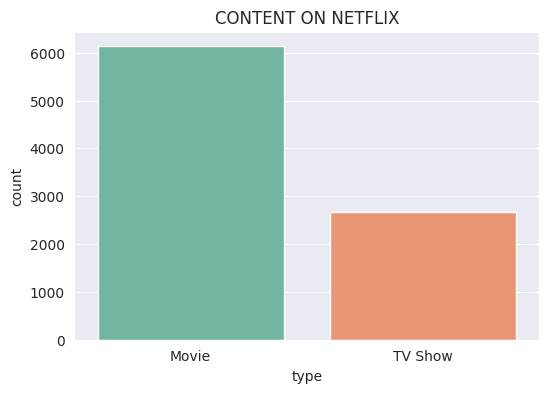

In [ ]:
plt.figure(figsize =(6,4))
sns.set_style("darkgrid")
sns.countplot(x = "type",data =df, palette = "Set2")
plt.title("CONTENT ON NETFLIX")

###In which year there was highest no of Tv Shows and Movie ?

In [ ]:
df["year"].value_counts()

2019.0         2016
2020.0         1879
2018.0         1649
2021.0         1498
2017.0         1188
2016.0          429
2015.0           82
2014.0           24
2011.0           13
2013.0           11
Unavailable      10
2012.0            3
2009.0            2
2008.0            2
2010.0            1
Name: year, dtype: int64

Text(0.5, 1.0, 'YEAR VS MOVIE & TV SHOWS')

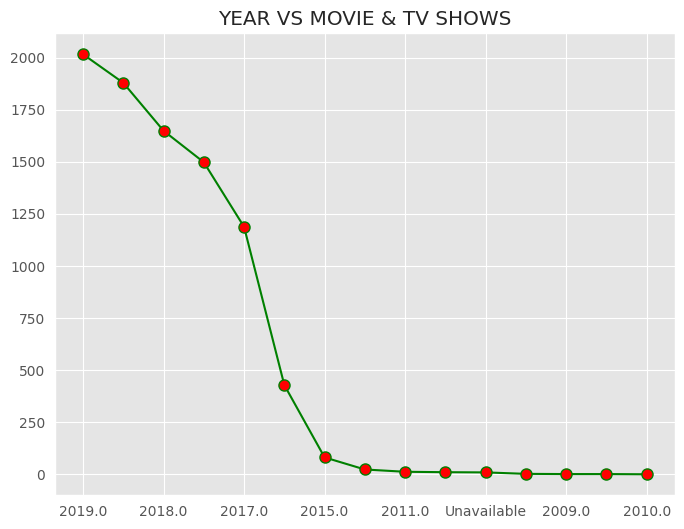

In [ ]:
plt.figure(figsize =(8,6))
plt.style.use("ggplot")
df["year"].value_counts().plot(kind ="line",color = 'green',linestyle = 'solid', marker = 'o',markerfacecolor = 'red', markersize = 8)   
plt.title("YEAR VS MOVIE & TV SHOWS")

####In which month there was highest no of TV Shows & Movies?

In [ ]:
df["month"] = df["month"].replace({1 : "Jan",2 : "Feb",3 : "March",4:"April",5 :"May",6 :"June",7 : "July",
                        8 : "Aug",9:"Sept", 10 : "Oct",11 : "Nov",12 : "Dec"})
df[:2]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Sept,2021.0
1,s2,TV Show,Blood & Water,Missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Sept,2021.0


In [ ]:
df["month"].value_counts()

July           827
Dec            813
Sept           770
April          764
Oct            760
Aug            755
March          742
Jan            738
June           728
Nov            705
May            632
Feb            563
Unavailable     10
Name: month, dtype: int64

Text(0.5, 1.0, 'MONTH VS MOVIE & TV SHOWS')

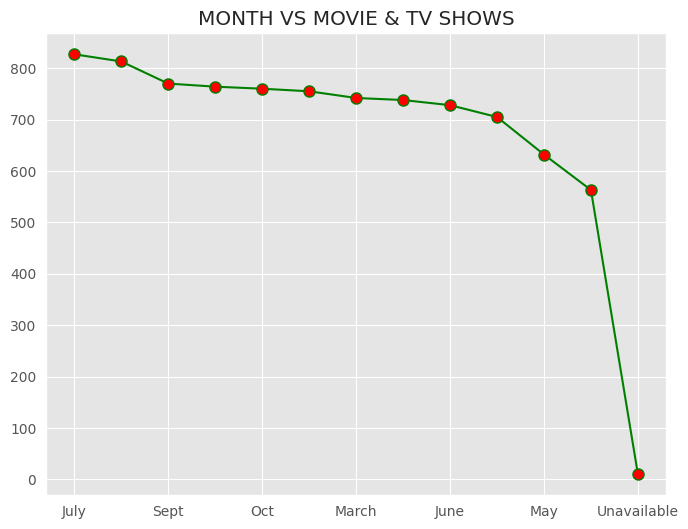

In [ ]:
plt.figure(figsize =(8,6))
plt.style.use("ggplot")
df["month"].value_counts().plot(kind ="line",color = 'green',linestyle = 'solid', marker = 'o',markerfacecolor = 'red', markersize = 8)   
plt.title("MONTH VS MOVIE & TV SHOWS")

####Top 10 countries content on netflix

Text(0.5, 1.0, 'Top 10 Countries Content On Netflix')

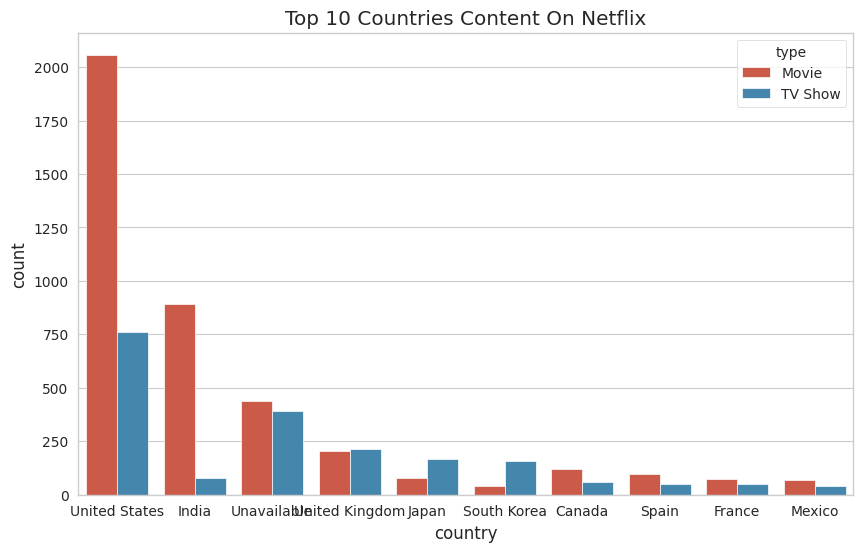

In [ ]:
plt.figure(figsize = (10,6))
sns.set_style("whitegrid")
sns.countplot(x="country", order = df["country"].value_counts().index[0:10],hue = "type",data = df)
plt.title("Top 10 Countries Content On Netflix")

####Which are the top 10 ratings given to the show?

In [ ]:
df["rating"].value_counts().head(10)

TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: rating, dtype: int64

Text(0.5, 1.0, 'Distribution Of Rating')

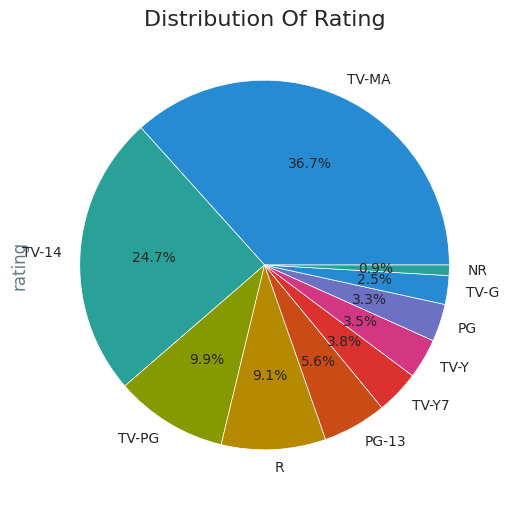

In [ ]:
plt.figure(figsize = (10,6))
plt.style.use("Solarize_Light2")
df["rating"].value_counts()[:10].plot(kind ="pie",autopct= "%1.1f%%")
plt.title("Distribution Of Rating")

####Find the highest watched genre on Netflix?

In [ ]:
df["Genre"].value_counts()[:10]

Dramas                      1600
Comedies                    1210
Action & Adventure           859
Documentaries                829
International TV Shows       774
Children & Family Movies     605
Crime TV Shows               399
Kids' TV                     388
Stand-Up Comedy              334
Horror Movies                275
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Most Popular Genre')

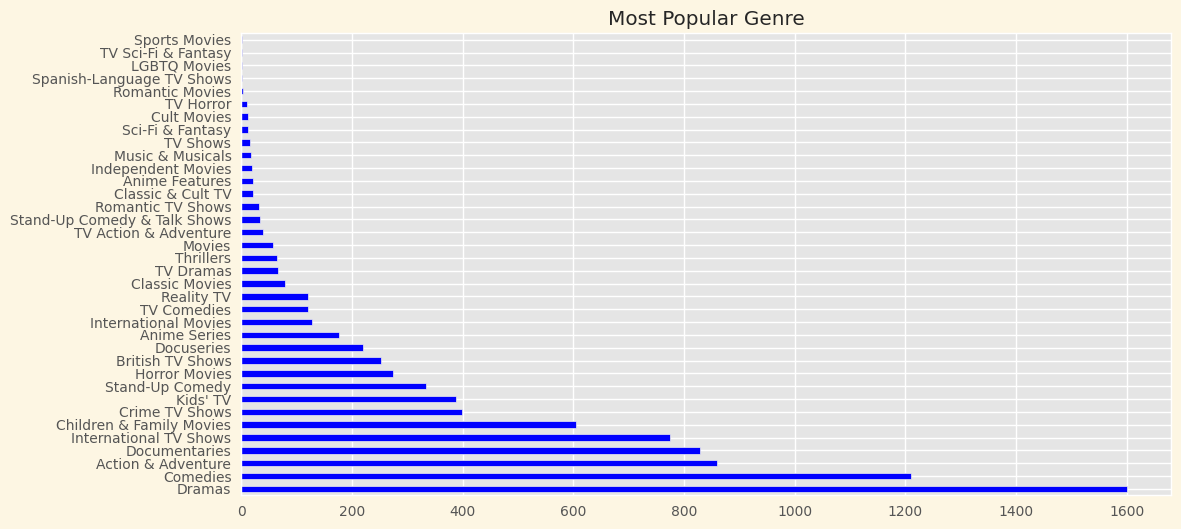

In [ ]:
plt.figure(figsize = (12,6))
plt.style.use("ggplot")
ax = df["Genre"].value_counts().plot(kind ="barh", color = "blue")
plt.title("Most Popular Genre")

####Top 10 directors which gave max no of shows?

In [ ]:
df["director"].value_counts().head(10)

Missing                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: director, dtype: int64

Text(0.5, 1.0, 'Top 10 Director')

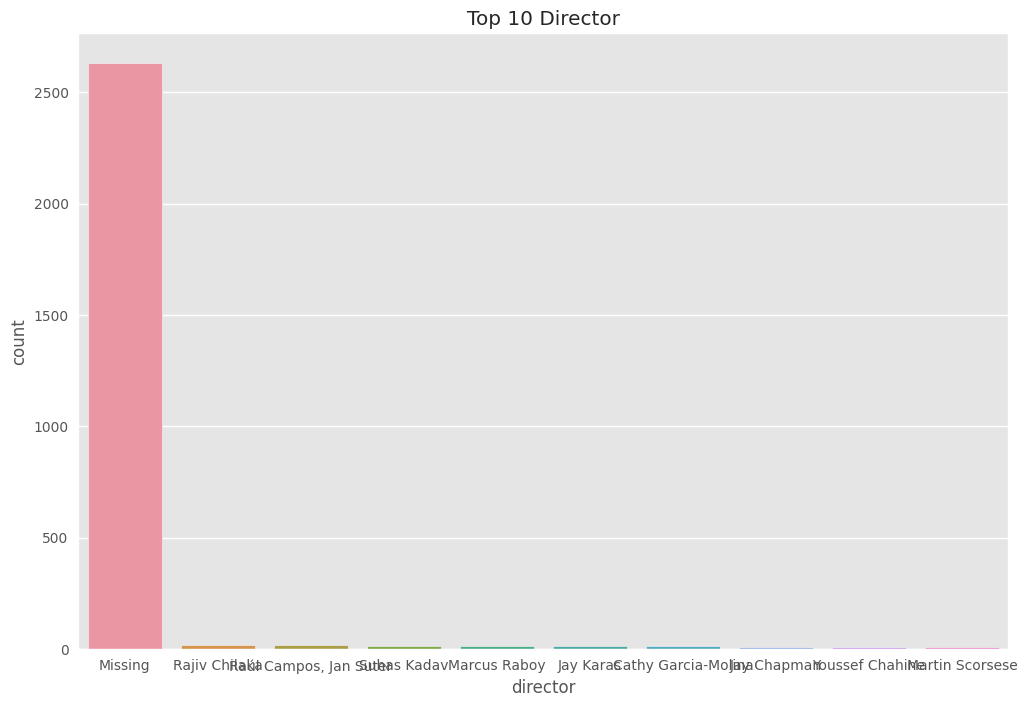

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x = "director", order = df["director"].value_counts().index[:10], data = df)
plt.title("Top 10 Director")

###**Summary**
We had performed lot of operation on these dataset and dig out some of the most useful information. We can conclude as follows:

1.   Netflix has more Movies than TV Shows
2.   Most No. Of Movies and TV Shows are produced By United States.
3.   2019 is the year in which Netflix has produced most no of content
4.   Similarly July is the month in which Netflix has produced most no of content.
5.   Rajiv Chilka is the top most director who has produced more no of movies on Netflix.
6.   Dramas is the Genre which is most popular among the audience.



